In [1]:
import numpy as np
import pickle

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

from scipy import interpolate

In [2]:
vVAE = 71
vCLF = 4
Eff_SM = 5.38e-06
use_loss = 'NLL'

In [3]:
# BSM_samples = ['Ato4l', 'Zprime', 'Wprime', 'leptoquark', 'hToTauTau', 'hChToTauNu']
BSM_samples = ['Ato4l', 'leptoquark', 'hToTauTau', 'hChToTauNu']

BSM_labels = {'Ato4l':r'$A\to 4\ell$', 
              'leptoquark':r'$LQ$', 
              'hToTauTau':r'$h^{0}\to \tau\tau$', 
              'hChToTauNu':r'$h^{\pm}\to \tau\nu$'}

VAE_loss = {'Tot':0, 'NLL':1, 'KL':2}

In [4]:
style_CLF = '--'
style_VAE = '-'

BSM_colors = {'Ato4l':'k', 'leptoquark':'g', 'hToTauTau':'r', 'hChToTauNu':'b'}

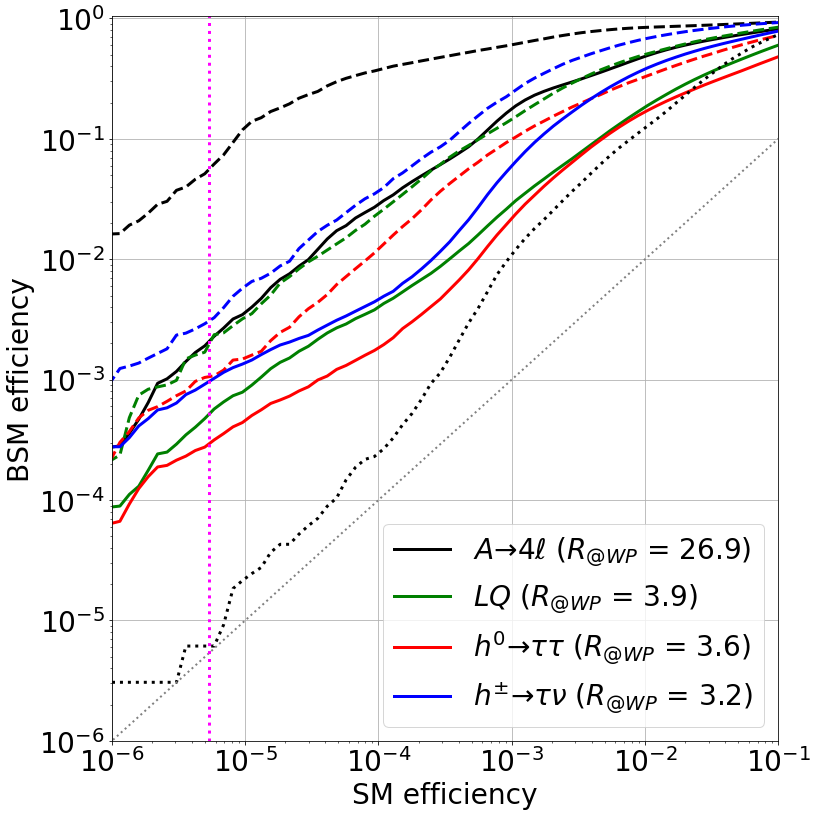

In [9]:
matplotlib.rcParams.update({'font.size': 28})
f = plt.figure(figsize=(12,12))

for n in BSM_samples:
    f = open('../Classifier/Classifier_HLF_v{v}/ROC_dict_{n}.pkl'.format(v=vCLF, n=n), 'r')
    dCLF = pickle.load(f)
    f.close()
    plt.plot(dCLF['eff_SM'], dCLF['eff_BSM'], 
             linestyle=style_CLF,
             lw=3,
             color=BSM_colors[n])
#              label='Clf {} (area = {:0.2f})'.format(BSM_labels[n], dCLF['roc_auc']))
    
    f = open('../VAE/VAE_HLFONLY/VAE_all-in-one_v{v}_ROC{ll}_dict_{n}.pkl'.format(v=vVAE, ll=VAE_loss[use_loss], n=n), 'r')
    dVAE = pickle.load(f)
    f.close()
    
    #Compute eff ratio @WP:
    f_CLF = interpolate.interp1d(dCLF['eff_SM'], dCLF['eff_BSM'])
    f_VAE = interpolate.interp1d(dVAE['eff_SM'], dVAE['eff_BSM'])
    ratio = f_CLF(Eff_SM)/f_VAE(Eff_SM)    
    
    plt.plot(dVAE['eff_SM'], dVAE['eff_BSM'], 
             linestyle=style_VAE,
             lw=3,
             color=BSM_colors[n],
#              label='{}'.format(BSM_labels[n]))
             label='{} ($R_{{@WP}}$ = {:0.1f})'.format(BSM_labels[n], ratio))


# Add A->4l on different CLF
f = open('../Classifier/Classifier_HLF_v{v}/ROC_dict_Ato4l_wCLFhChToTauNu.pkl'.format(v=vCLF), 'r')
dCLF = pickle.load(f)
f.close()
plt.plot(dCLF['eff_SM'], dCLF['eff_BSM'], 
         linestyle=':',
         lw=3,
         color=BSM_colors['Ato4l'])

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle=':')
plt.plot([Eff_SM, Eff_SM], [1e-6, 1.05], color='magenta', lw=3, linestyle=':')
plt.xlim([1e-6, 0.1])
plt.ylim([1e-6, 1.05])
plt.xlabel('SM efficiency')
plt.ylabel('BSM efficiency')
plt.title('')
plt.legend(loc='lower right')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.tight_layout()

plt.savefig('../fig/paper_fig/ROC_vCLF{}_vVAE{}-{}_wCLFxapp_2.png'.format(vCLF, vVAE, use_loss))

In [15]:
np.mean([27,4,4,3])

9.5